In [3]:
import pandas as pd
from tqdm import tqdm

In [4]:
data = pd.read_csv("/kaggle/input/spotify-data/dataset.csv")

# Рассмотрим как выглядят данные

In [5]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Сразу удалим столбец повторяющий индексацию

In [6]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Описание каждой колонки данных
 (Пояснения для описания можно прочитать в оффициальном апи spotify https://developer.spotify.com/documentation/web-api/reference/get-audio-features) Формулировки многих описаний для переменных взяты из документации. 

### **track_id** - Уникальный идентификатор для каждого трека
### **artists** - перечесление всех исполнителей песни. Исполнители разделеный символом ";"
### **album_name** - имя альбома
### **track_name** - имя трека
### **popularity** - целевая переменная с целочисленным зачением в промежутке от 0 до 100
### **duration_ms** - длительность трека в милисекундах
### **explicit** - бинарное значение, содержится ли контент не предназанченный для несовершеннолетних. 0 - если не содержит, 1 - если содержит.
### **danceability** - оценка того, насколько трек подходит для танцев (анализируется темп, стабильность ритма и другие характеристики). Действительное число от 0 до 1
### **energy** - оценка того, насколько трек энергичен. (Из доукентации spotify: "typically, energetic tracks feel fast, loud, and noisy."). Число от 0 до 1
### **key** - (из апи spotify: "Тональность, в которой находится трек. Целые числа сопоставляются с тонами с использованием стандартной нотации класса тональности . Например, 0 = C, 1 = C♯/D♭, 2 = D и т. д. Если тон не обнаружен, значение равно -1.")
### **loudness** - громкость в дицибелах. Вещесвенное число, чаще всего отрицательное
### **mode** - модальность трека. Мажор представлен 1, а минор — 0.
### **speechiness** - оценка того, насколько трек похож на речь. Вещественное число от 0 до 1. 1 наиболее близкие значения для аудио файлов наиболее похожих например на подкаст илир аудиокнигу.
### **acousticness** - Мера уверенности от 0,0 до 1,0 того, является ли трек акустическим. 1,0 представляет высокую уверенность в том, что трек является акустическим.
### **instrumentalness** - оценка того, насколько много в треке инстрментальных элементов. Тем ближе к 0, чем больше вокала
### **liveness** - присутствие аудитории при запистся (признак того насколько "живой" звук). Число от 0 до  1
### **valence** - оценка музыкальной позитивности трека. Число от 0 до  1
### **tempo** - Общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения, который напрямую выводится из средней длительности удара.
### **time_signature** - Оценочный размер такта. Размер такта (метр) — это условное обозначение, указывающее, сколько долей содержится в каждом такте (или такте). Размер такта варьируется от 3 до 7, что указывает на размеры от «3/4» до «7/4».
### **track_genre** - жанр трека. Строка

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [9]:
data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
data.dropna(inplace=True)

# Track_id

### id трека не является уникальным в таблице. Более 20000 записей с совпадающим id

In [17]:
track_ids = data["track_id"].unique()
len(track_ids)

89740

In [18]:
len(data)

113999

### Сначала удалим строки, у которых все значения совпадют (это более 400 строк)

In [34]:
data = data.drop_duplicates()

In [35]:
len(data)

113549

## Проверим какие колонки совпадают у треков с одинаковым id

In [36]:
trackid_to_tracks = {}
for i in tqdm(range(len(data))):
    track_id = data.iloc[i]["track_id"]
    if track_id in trackid_to_tracks:
        trackid_to_tracks[track_id].append(data.iloc[i])
    else:
        trackid_to_tracks[track_id] = [data.iloc[i]]

100%|██████████| 113549/113549 [00:15<00:00, 7165.63it/s]


In [37]:
not_similar_column_values_counter = {column_name: 0 for column_name in data.columns}
track_ids_with_similar_popularity = []
for track_id in tqdm(track_ids):
    tracks = pd.DataFrame(trackid_to_tracks[track_id])
    if len(tracks) == 1:
        continue
    for column_name in tracks.columns:
        column_values = tracks[column_name]
        if len(set(column_values)) != 1:
            if column_name == "popularity":
                track_ids_with_similar_popularity.append(track_id)
            not_similar_column_values_counter[column_name] += len(tracks)
            
        

100%|██████████| 89740/89740 [01:31<00:00, 977.76it/s] 


## У треков с одинаковым id чаще всего совпадает жанр. Таким образом в таблице представлены треки у которых много жанров
## Также у некоторых треков совпадает отличается popularity

In [41]:
not_similar_column_values_counter

{'track_id': 0,
 'artists': 0,
 'album_name': 0,
 'track_name': 0,
 'popularity': 1928,
 'duration_ms': 0,
 'explicit': 0,
 'danceability': 0,
 'energy': 0,
 'key': 0,
 'loudness': 0,
 'mode': 0,
 'speechiness': 0,
 'acousticness': 0,
 'instrumentalness': 0,
 'liveness': 0,
 'valence': 0,
 'tempo': 0,
 'time_signature': 0,
 'track_genre': 40108}

In [42]:
data_similar_popularity = data.query(f"track_id in {track_ids_with_similar_popularity}").sort_values("track_id")

In [43]:
aggregated_similar_popularity = data_similar_popularity.groupby("track_id")["popularity"].aggregate(lambda x: abs(x.max() - x.min()))
aggregated_similar_popularity

track_id
00YwP3wJWiG8IxAA7OS9lo    1
014SIjoLDG1Ku19c5FlDYh    3
02jLfqc9gMo8PkHEGHY3OT    1
03mHinvLdrdSTd7w4GPXwH    2
04IUJPcxiUuXih8eJIVzGz    1
                         ..
7w87IxuO7BDcJ3YUqCyMTT    1
7wEKVEEo4Vmn1qNvL7AZNf    1
7x2rua8HcHsaJV5ib1BQbu    1
7x7i3XBKSM4AoLoPymDuh9    1
7z1uUb32IxZvJ97Fk86igf    2
Name: popularity, Length: 720, dtype: int64

## На гистограмме представлен рапределения разницы popularity для тех треков, у которых id совпадает но отличается popularity. На гистограмме видно, что чаще всего значения отличаются всего на несколько едениц, и только в еденицчных случаях popularity отличается значительно.

<Axes: >

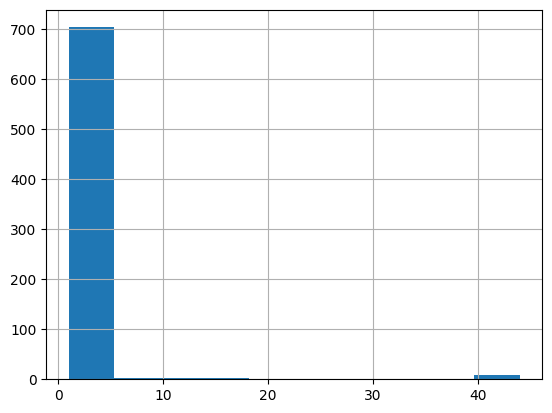

In [44]:
aggregated_similar_popularity.hist()

### Здесь представлено количетво записей с одинаковы id и popularity для каждого жанра. Как видно, у большого количества совпадают жанры.
### Это значит, что у многих записей отличаются только popularity. При этом все5 другие колонки (в том числе жанр) совпадают

In [46]:
data.query(f"track_id in {track_ids_with_similar_popularity}")["track_genre"].value_counts()

track_genre
reggae         91
reggaeton      90
latino         86
trance         77
rock           74
               ..
guitar          1
heavy-metal     1
salsa           1
mandopop        1
grunge          1
Name: count, Length: 94, dtype: int64

In [95]:
agg_funcs = {col: col for col in data.columns}


In [96]:
agg_funcs

{'track_id': 'track_id',
 'artists': 'artists',
 'album_name': 'album_name',
 'track_name': 'track_name',
 'popularity': 'popularity',
 'duration_ms': 'duration_ms',
 'explicit': 'explicit',
 'danceability': 'danceability',
 'energy': 'energy',
 'key': 'key',
 'loudness': 'loudness',
 'mode': 'mode',
 'speechiness': 'speechiness',
 'acousticness': 'acousticness',
 'instrumentalness': 'instrumentalness',
 'liveness': 'liveness',
 'valence': 'valence',
 'tempo': 'tempo',
 'time_signature': 'time_signature',
 'track_genre': 'track_genre'}

## Объеденим строки у которых отличается жанр. Теперь жанры будут перечисляться через ';'

In [115]:
result = data.groupby('track_id', as_index=False).agg({"track_genre": lambda x: '; '.join(x.unique())})


In [116]:
result.set_index('track_id', inplace=True)
result.sort_index(inplace=True)


,track_genre
track_id,
0000vdREvCVMxbQTkS888c,german
000CC8EParg64OmTxVnZ0p,club
000Iz0K615UepwSJ5z2RE5,minimal-techno
000RDCYioLteXcutOjeweY,hip-hop
000qpdoc97IMTBvF8gwcpy,minimal-techno
...,...
7zxHiMmVLt4LGWpOMqOpUh,pop-film
7zxpdh3EqMq2JCkOI0EqcG,disney
7zyYmIdjqqiX6kLryb7QBx,mandopop


track_genre    german
Name: 0000vdREvCVMxbQTkS888c, dtype: object

In [123]:
for i in tqdm(range(len(data))):
    track_id = data.iloc[i]["track_id"]
    data.iloc[i]["track_genre"] = result.loc[track_id]["track_genre"]

  0%|          | 0/113549 [00:00<?, ?it/s]/tmp/ipykernel_30/1042526855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i]["track_genre"] = result.loc[track_id]["track_genre"]
100%|██████████| 113549/113549 [00:24<00:00, 4623.55it/s]


In [128]:
data.drop_duplicates(inplace=True)

In [129]:
data["track_genre"].values()

TypeError: 'numpy.ndarray' object is not callable

### Сделаем так, чтобы для строк с разным popularity но одинаковым id считалось среднее popularity

In [47]:
result = data.groupby('track_id', as_index=False)['popularity'].mean()

print(result)

                     track_id  popularity
0      0000vdREvCVMxbQTkS888c        44.0
1      000CC8EParg64OmTxVnZ0p        47.0
2      000Iz0K615UepwSJ5z2RE5        22.0
3      000RDCYioLteXcutOjeweY        62.0
4      000qpdoc97IMTBvF8gwcpy        19.0
...                       ...         ...
89735  7zxHiMmVLt4LGWpOMqOpUh        56.0
89736  7zxpdh3EqMq2JCkOI0EqcG        23.0
89737  7zyYmIdjqqiX6kLryb7QBx        61.0
89738  7zybSU9tFO9HNlwmGF7stc        54.0
89739  7zz7iNGIWhmfFE7zlXkMma        22.0

[89740 rows x 2 columns]
